In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')




Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# defining global variable path
# Location of my dataset on My Google Drive
import tensorflow as tf

def loadTrainImages(path):
    train_files = sorted([os.path.join(path, 'trainingset', file)
                          for file in os.listdir(path + "/trainingset")
                          if file.endswith('.jpg')])
    return train_files
def loadTestImages(path):
    test_files = sorted([os.path.join(path, 'testset', file)
                          for file in os.listdir(path + "/testset")
                          if file.endswith('.jpg')])
    return test_files






In [ ]:

# Preprocessing of the image data
def processing(data):
    
    # Reading images to work
    img = [cv2.imread(i, cv2.COLOR_BAYER_BG2GRAY) for i in data]
    print('Original size',img[0].shape)
    
    # setting dimension of the resize
    height = 50
    width = 50
    dim = (width, height)
    res_img = []
    for i in range(len(img)):
        res = cv2.resize(img[i], dim, interpolation=cv2.INTER_LINEAR)
        res = tf.keras.preprocessing.image.img_to_array(res)
        res = res/255
        res_img.append(res)
    
  

    # Checking the size
    print('RESIZED', res_img[1].shape)
    print('Length of image list: ',len(res_img))
    X = np.array(res_img)
    return X
    
    
    
    

In [ ]:
def main():
    # calling global variable
    global image_path
    global X_training
    global X_testing
    '''The var Dataset is a list with all images in the folder '''
    X_train = loadTrainImages('./Dataset/Trainingset/')
    X_test = loadTestImages('./Dataset/Testing set/')
    print('Number of files in training set: ', len(X_train))
    print("List of files the first 3 in the folder:\n",X_train[:40])
    print('Number of files in testing set: ', len(X_test))
    print("List of files the first 3 in the folder:\n",X_test[:6])
    
    # sending all the images to pre-processing
    X_training = processing(X_train)
    X_testing = processing(X_test)

   
main()
  

Number of files in training set:  40
List of files the first 3 in the folder:
 ['/content/drive/My Drive/trainingset/Cat (10).jpg', '/content/drive/My Drive/trainingset/Cat (11).jpg', '/content/drive/My Drive/trainingset/Cat (12).jpg', '/content/drive/My Drive/trainingset/Cat (13).jpg', '/content/drive/My Drive/trainingset/Cat (14).jpg', '/content/drive/My Drive/trainingset/Cat (15).jpg', '/content/drive/My Drive/trainingset/Cat (16).jpg', '/content/drive/My Drive/trainingset/Cat (17).jpg', '/content/drive/My Drive/trainingset/Cat (18).jpg', '/content/drive/My Drive/trainingset/Cat (19).jpg', '/content/drive/My Drive/trainingset/Cat (2).jpg', '/content/drive/My Drive/trainingset/Cat (3).jpg', '/content/drive/My Drive/trainingset/Cat (4).jpg', '/content/drive/My Drive/trainingset/Cat (5).jpg', '/content/drive/My Drive/trainingset/Cat (6).jpg', '/content/drive/My Drive/trainingset/Cat (7).jpg', '/content/drive/My Drive/trainingset/Cat (8).jpg', '/content/drive/My Drive/trainingset/Cat (9

In [ ]:
X_training

array([[[[0.19607843, 0.24705882, 0.23921569],
         [0.20392157, 0.25490198, 0.24705882],
         [0.21568628, 0.25882354, 0.2509804 ],
         ...,
         [0.34901962, 0.27450982, 0.16862746],
         [0.23529412, 0.20392157, 0.14901961],
         [0.01960784, 0.05490196, 0.08627451]],

        [[0.1764706 , 0.24705882, 0.2509804 ],
         [0.18039216, 0.2509804 , 0.25490198],
         [0.21176471, 0.2627451 , 0.27058825],
         ...,
         [0.3647059 , 0.2901961 , 0.18431373],
         [0.3019608 , 0.24705882, 0.15294118],
         [0.03921569, 0.04313726, 0.03137255]],

        [[0.01960784, 0.07058824, 0.09803922],
         [0.01176471, 0.0627451 , 0.09411765],
         [0.01176471, 0.07450981, 0.1254902 ],
         ...,
         [0.3647059 , 0.28235295, 0.17254902],
         [0.3019608 , 0.23529412, 0.12941177],
         [0.05490196, 0.03529412, 0.03137255]],

        ...,

        [[0.        , 0.04313726, 0.05882353],
         [0.        , 0.03921569, 0.05490196]

In [ ]:
# label = 0 for cats , label = 1 for dogs
y_training = np.array([0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1])
y_testing = np.array([0,0,0,1,1,1])

In [ ]:
y_testing

array([0, 0, 0, 1, 1, 1])

In [ ]:
# Reshaping the data
X_training = np.reshape(X_training, (X_training.shape[0],-1))
X_testing = np.reshape(X_testing, (X_testing.shape[0], -1))

In [ ]:
# new shapes
(X_training.shape, X_testing.shape, y_training.shape, y_testing.shape)

((40, 7500), (6, 7500), (40,), (6,))

In [ ]:
# calculating means in X_train and X_test
sum1 = 0
means_train = []
for row in X_training:
  sum = np.sum(row)
  mean_train = sum/len(row)
  means_train.append(mean_train) 

sum2 = 0
means_test = []
for row in X_testing:
  sum = np.sum(row)
  mean_test = sum/len(row)
  means_test.append(mean_test) 








In [ ]:
# Calculating variance in X_train ans X_test
variances_train = []
for row in X_training:
  variances_train.append(np.var(row))

variances_test = []
for row in X_testing:
  variances_test.append(np.var(row))



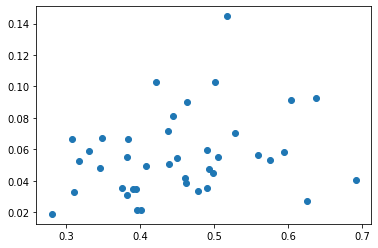

In [ ]:
#plotting means and variances 
plt.scatter(means_train,variances_train)

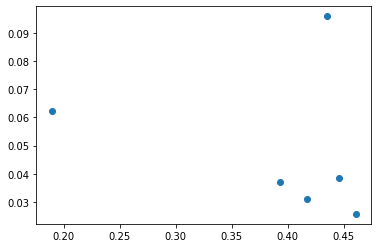

In [ ]:
plt.scatter(means_test,variances_test)

In [ ]:
# combining mean and variance to form a 2 dimensional point for calculating distance
featurepoints_train = []
for i in range(0,len(means_train)):
  featurepoints_train.append((means_train[i],variances_train[i]))

featurepoints_test = []
for i in range(0,len(means_test)):
  featurepoints_test.append((means_test[i],variances_test[i]))
len(featurepoints_test)
  

6

In [ ]:
# calculate the accuracy
def getAccuracy(testSet, predictions):
  correct = 0
  for x in range(len(testSet)):
    if testSet[x] == predictions[x]:
      correct += 1
  return (correct/float(len(testSet))) * 100.0

In [ ]:
# Single-Layer Perceptron
class Perceptron(object):

    def __init__(self, inputs, no_of_iterations=500, learning_rate=0.01):
        self.no_of_iterations = no_of_iterations
        self.learning_rate = learning_rate
        self.weights = np.zeros(inputs + 1)
           
    def predict(self, inputs):
        sum = self.weights[0]
        for i in range(len(inputs)-1):
          sum += self.weights[i + 1] * inputs[i]
        if sum > 0:
          activation = 1
        else:
          activation = 0            
        return activation

    def train(self, training_inputs, labels):
        for _ in range(self.no_of_iterations):
            for inputs, label in zip(training_inputs, labels):
                prediction = self.predict(inputs)
                self.weights[1:] += self.learning_rate * (label - prediction) * inputs
                self.weights[0] += self.learning_rate * (label - prediction)

In [ ]:
# creating object of Perceptron class
percep = Perceptron(inputs = 7500)
percep.train(X_training,y_training)


# make predictions on the testing data
def prediction(trained):
  predictions_slp = [] 
  for x in range (len(X_testing)):
    predictions_slp.append(trained.predict(X_testing[x]))
  return predictions_slp

In [ ]:
predictions_new = prediction(percep)

In [ ]:
# accuracy of the predictions from the single layer perceptron
accuracy = getAccuracy(y_testing,predictions_new)
accuracy

0.0

So, the accuracy that we obtain for the test set is 50% 
